In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_digits()
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
dataset.data.shape

(1797, 64)

In [4]:
dataset.images.shape

(1797, 8, 8)

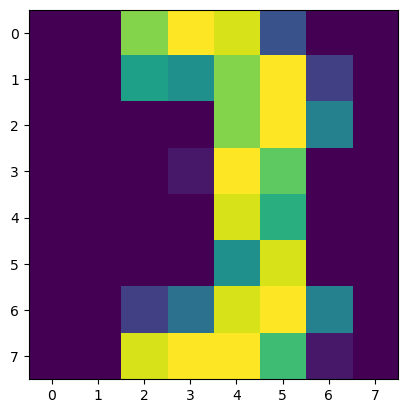

In [5]:
plt.imshow(dataset.images[89])

In [6]:
print(dataset.target.shape)
print(dataset.target[89])

(1797,)
3


In [7]:
X = dataset.data
Y = dataset.target
Y = np.eye(10)[Y]  #one hot

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [8]:
print(Y_train)
print(np.unique(Y_train))
print(len(np.unique(Y_train)))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[0. 1.]
2


In [9]:
def sigmoid(X):
  return 1 / (1 + np.exp(-X))

def softmax(X):
  return np.exp(X) / np.sum(np.exp(X))

def root_mean_square_error(Y_gt, Y_pred):
  return np.sqrt(np.mean((Y_gt - Y_pred) ** 2))

In [10]:
epochs = 80
η = 0.001   #learning rate

D_in = X_train.shape[1]
H1 = 128
H2 = 32
#D_out = len(np.unique(Y_train))
D_out = Y_train.shape[1]

In [11]:
W1 = np.random.randn(D_in, H1)
W2 = np.random.randn(H1, H2)
W3 = np.random.randn(H2, D_out)

B1 = np.random.randn(1, H1)
B2 = np.random.randn(1, H2)
B3 = np.random.randn(1, D_out)

In [12]:
for epoch in range(epochs):

  #train

  Y_pred_train = []
  for x,y in zip(X_train, Y_train):

    x = x.reshape(-1, 1)
    #print('x:',x,'x.shape:',x.shape)
    #print('y:',y,'y.shape:', y.shape)
    #forward

    #layer1
    out1 = sigmoid(x.T @ W1 + B1)
    #print('out1.shape:', out1.shape)

    #layer2
    out2 = sigmoid(out1 @ W2 + B2)
    #print('out2.shape:', out2.shape)

    #layer3
    out3 = softmax(out2 @ W3 + B3)
    #print('out3.shape:', out3.shape)

    y_pred = out3
    Y_pred_train.append(y_pred)

    #error = y - y_pred

    #backward - باید همش مشتق بگیریم

    #layer3
    error = -2 * (y - y_pred) # error dar vaghe hamman grad_error yani moshtagh error hast
    grad_B3 = error
    grad_W3 = out2.T @ error

    #layer2
    error = error @ W3.T * out2 * (1 - out2)
    grad_B2 = error
    grad_W2 = out1.T @ error

    #layer1
    error = error @ W2.T * out1 * (1 - out1)
    grad_B1 = error
    grad_W1 = x @ error



    #update

    #layer1
    W1 -= η * grad_W1
    B1 -= η * grad_B1

    #layer2
    W2 -= η * grad_W2
    B2 -= η * grad_B2

    #layer3
    W3 -= η * grad_W3
    B3 -= η * grad_B3

  Y_pred_test = []
  for x,y in zip(X_test, Y_test):

    x = x.reshape(-1, 1)
    #print('x:',x,'x.shape:',x.shape)
    #print('y:',y,'y.shape:', y.shape)
    #forward

    #layer1
    out1 = sigmoid(x.T @ W1 + B1)
    #print('out1.shape:', out1.shape)

    #layer2
    out2 = sigmoid(out1 @ W2 + B2)
    #print('out2.shape:', out2.shape)

    #layer3
    out3 = softmax(out2 @ W3 + B3)
    #print('out3.shape:', out3.shape)

    y_pred = out3
    Y_pred_test.append(y_pred)

  Y_pred_train = np.array(Y_pred_train).reshape(-1, 10)

  loss_train = root_mean_square_error(Y_train, Y_pred_train)
  accuracy_train = np.sum(np.argmax(Y_train, axis=1) == np.argmax(Y_pred_train, axis=1)) / len(Y_train)
  print('----------------------------epoch:', epoch,'--------------------------------------------')
  print('loss train:',loss_train)
  print('accuracy train:',accuracy_train)

  Y_pred_test = np.array(Y_pred_test).reshape(-1, 10)

  loss_test = root_mean_square_error(Y_test, Y_pred_test)
  accuracy_test = np.sum(np.argmax(Y_test, axis=1) == np.argmax(Y_pred_test, axis=1)) / len(Y_test)

  print('loss test:',loss_test)
  print('accuracy test:',accuracy_test)

----------------------------epoch: 0 --------------------------------------------
loss train: 0.31963182129211243
accuracy train: 0.17954070981210857
loss test: 0.2996682322976206
accuracy test: 0.25
----------------------------epoch: 1 --------------------------------------------
loss train: 0.2798590721345495
accuracy train: 0.3653444676409186
loss test: 0.27236890985482376
accuracy test: 0.4083333333333333
----------------------------epoch: 2 --------------------------------------------
loss train: 0.25497235935286683
accuracy train: 0.5031315240083507
loss test: 0.25534251180835554
accuracy test: 0.5027777777777778
----------------------------epoch: 3 --------------------------------------------
loss train: 0.23719643023987774
accuracy train: 0.6005567153792624
loss test: 0.242232221280028
accuracy test: 0.5833333333333334
----------------------------epoch: 4 --------------------------------------------
loss train: 0.22306062099295934
accuracy train: 0.6701461377870563
loss test: 0

In [20]:
import cv2

image = cv2.imread("num2.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.reshape(64, 1)

x = image
#forward

#layer1
out1 = sigmoid(x.T @ W1 + B1)

#layer2
out2 = sigmoid(out1 @ W2 + B2)

#layer3
out3 = softmax(out2 @ W3 + B3)
y_pred = out3
print(np.argmax(y_pred))

2
